# ***Let's Begin!***

**Introduction**

We have a dataset containing some data on students, including the marks they get in some exams. Let's analyze them a bit, to try to understand if we can find some link between the various fields of this dataset and together let's try to predict them with some simple model.

**Data Viewing**

Import useful libraries

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [ ]:
filepath = '../input/students-performance-in-exams/StudentsPerformance.csv'
data = pd.read_csv(filepath)

Create a copy of the dataset which i will work on and have took a look at tha data

In [ ]:
df= data.copy()
df.head()

Take a look to understand what are the dtype of the variables

In [ ]:
df.info()

See the titles of the columns

In [ ]:
df.columns

Renaming some of the column's title for praticity

In [ ]:
df.rename(inplace = True,
         columns = {
             'race/ethnicity':'ethnicity',
             'parental level of education':'parental_level_of_education',
             'test preparation course':'test_preparation_course',
             'math score':'math_score',
             'reading score':'reading_score',
             'writing score':'writing_score'
            })

In [ ]:
df.head()

Create a new variabile rapresenting tha average of the three subjects

In [ ]:
df['average_score']= df[['math_score','reading_score','writing_score']].mean(axis = 1)

Take a general look at the scores

In [ ]:
df.describe()

Create a new columns with a grade instead of a number mark for all the subjects

In [ ]:
def Grade(score):
    if score >= 80 : return 'A'
    if score >= 70 : return 'B'
    if score >= 60 : return 'C'
    if score >= 50 : return 'D'
    if score >= 40 : return 'E'
    else: return 'F'
df['math_grade'] = df.apply(lambda x: Grade(x["math_score"]), axis = 1)
df['reading_grade'] = df.apply(lambda x: Grade(x["reading_score"]), axis = 1)
df['writing_grade'] = df.apply(lambda x: Grade(x["writing_score"]), axis = 1)
df['average_grade'] = df.apply(lambda x: Grade(x["average_score"]), axis = 1)

In [ ]:
df.head()

# **Plotting plots to see the scores in the tests**

***Math test***

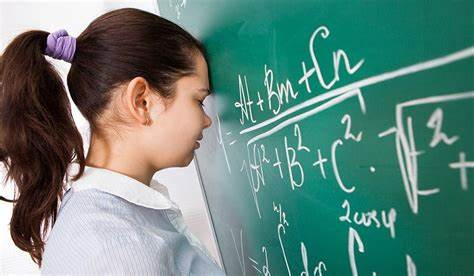

First of all we take a look of the percentage of the scores

In [ ]:
plt.figure(figsize=(14, 7))
labels=df['math_grade'].value_counts().index
plt.pie(df['math_grade'].value_counts().values,labels=labels,explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05],colors=["#EC6173", "#F1AE4A", "#E1DD6E", "#51A350", "#6964FF", "#BD63BE"],
        autopct='%1.1f%%', startangle=90)
plt.title('Math Grade Pie Chart',fontsize=20,pad=40)
plt.axis('equal')
plt.show()

Secondly we observe the distribution of these scores.

In [ ]:
plt.figure(figsize=(10, 8))
sns.distplot(df['math_score'], kde_kws = {'linewidth': 3})
plt.show()

Finally we see the difference of performance between males and females.

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y="math_grade", order= ['A','B','C','D','E','F'], hue="gender", data=df)

***Reading test***

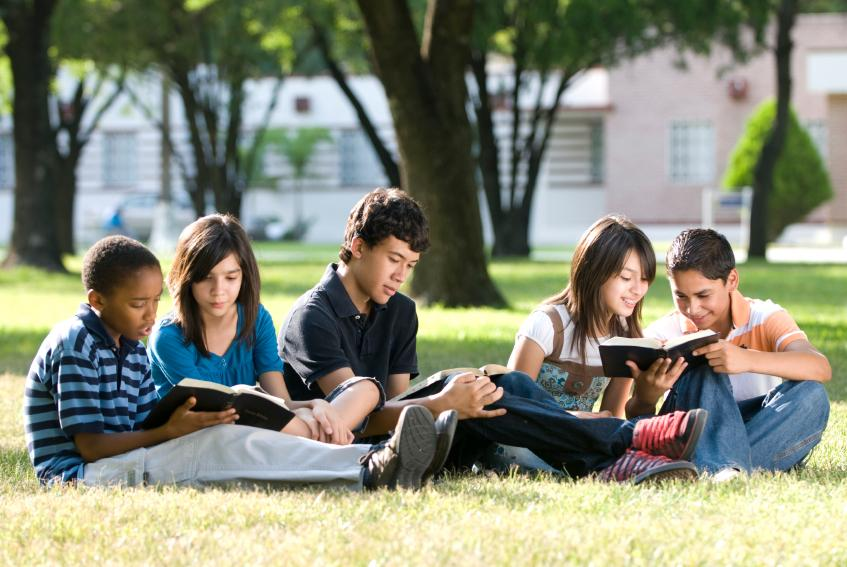

First of all we take a look of the percentage of the scores

In [ ]:
plt.figure(figsize=(14, 7))
labels=df['reading_grade'].value_counts().index
plt.pie(df['reading_grade'].value_counts().values,labels=labels,explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05],colors=["#EC6173", "#F1AE4A", "#E1DD6E", "#51A350", "#6964FF", "#BD63BE"],
        autopct='%1.1f%%', startangle=90)
plt.title('Reading Grade Pie Chart',fontsize=20,pad=40)
plt.axis('equal')
plt.show()

Secondly we observe the distribution of these scores

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(df['reading_score'], kde_kws = {'linewidth': 3})
plt.show()

Finally we see the difference of performance between males and females

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y="reading_grade", order= ['A','B','C','D','E','F'], hue="gender", data=df)

***Writing test***

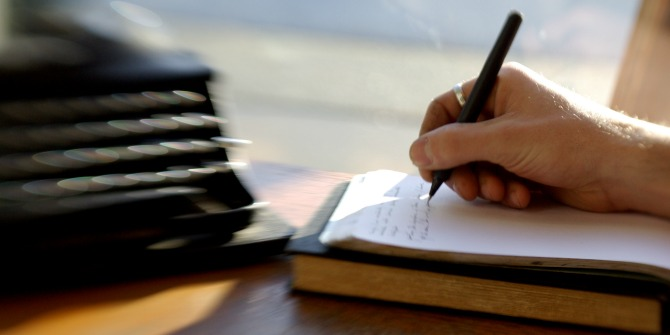

First of all we take a look of the percentage of the scores

In [ ]:
plt.figure(figsize=(14, 7))
labels=df['writing_grade'].value_counts().index
plt.pie(df['writing_grade'].value_counts().values,labels=labels,explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05],colors=["#EC6173", "#F1AE4A", "#E1DD6E", "#51A350", "#6964FF", "#BD63BE"],
        autopct='%1.1f%%', startangle=90)
plt.title('Writing Grade Pie Chart',fontsize=20,pad=40)
plt.axis('equal')
plt.show()

Secondly we observe the distribution of these scores

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(df['writing_score'], kde_kws = {'linewidth': 3})
plt.show()

Finally we see the difference of performance between males and females

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y="writing_grade", order= ['A','B','C','D','E','F'], hue="gender", data=df)

***Average scores***

After having looked at the various tests separately, now let's look at them a little more generically with the percentage of the average score. First illustrated in a pie chart and then in a countplot

In [ ]:
plt.figure(figsize=(14, 7))
labels=df['average_grade'].value_counts().index
plt.pie(df['average_grade'].value_counts().values,labels=labels,explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05],colors=["#EC6173", "#F1AE4A", "#E1DD6E", "#51A350", "#6964FF", "#BD63BE"],
        autopct='%1.1f%%', startangle=90)
plt.title('Avg Grade Pie Chart',fontsize=20,pad=40)
plt.axis('equal')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y="average_grade", order= ['A','B','C','D','E','F'], hue="gender", data=df)

***Ethnicity***

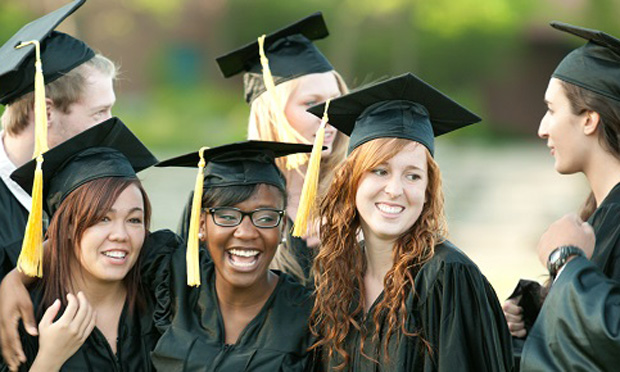

Now let's take a look at ethnicity and see how students are grouped by ethnicity

In [ ]:
plt.figure(figsize=(14, 7))
labels=df['ethnicity'].value_counts().index
plt.pie(df['ethnicity'].value_counts().values,labels=labels,explode=[0.05, 0.05, 0.05, 0.05, 0.05],colors=["#EC6173", "#F1AE4A", "#E1DD6E", "#51A350", "#6964FF", "#BD63BE"],
        autopct='%1.1f%%', startangle=90)
plt.title('Ethnicity Pie Chart',fontsize=20,pad=40)
plt.axis('equal')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="ethnicity", order= ['group A','group B','group C','group D','group E'], hue="gender", data=df)

***Parental level of education***

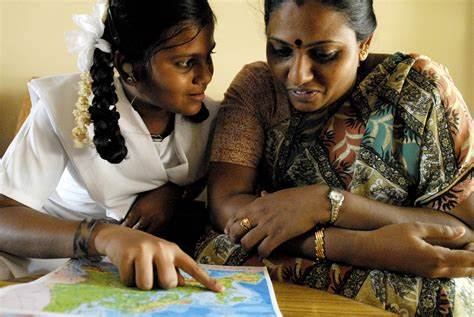

Now let's see if the parental level of education influnce the scores at school.

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="parental_level_of_education", order= ['some college','associate\'s degree','high school','some high school','bachelor\'s degree', 'master\'s degree'], hue="gender", data=df)

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="parental_level_of_education", order= ['some college','associate\'s degree','high school','some high school','bachelor\'s degree', 'master\'s degree'], hue="ethnicity", hue_order = ['group A','group B','group C','group D','group E'], data=df)

***Lunch***

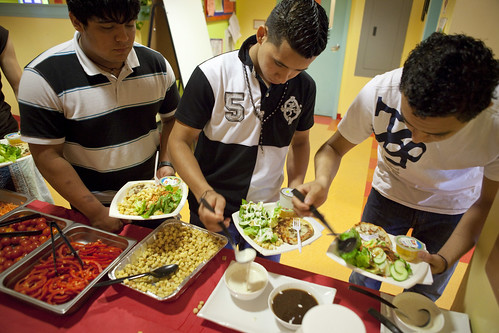

Can lunch affect school performance? Let's try to figure it out with graphs

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="math_grade", order= ['A','B','C','D','E','F'], hue="lunch", data=df)

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="reading_grade", order= ['A','B','C','D','E','F'], hue="lunch", data=df)

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="writing_grade", order= ['A','B','C','D','E','F'], hue="lunch", data=df)

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="average_grade", order= ['A','B','C','D','E','F'], hue="lunch", data=df)

***Test preparation course***

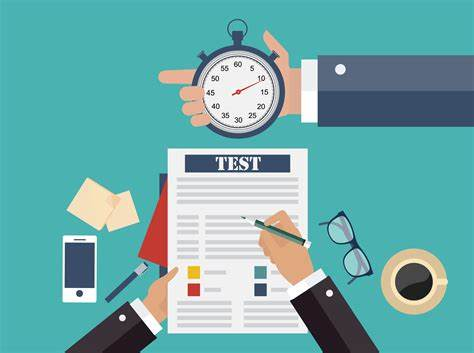

Let's see if taking the preparation course is essential to get a good grade or you can also study independently

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="math_grade", order= ['A','B','C','D','E','F'], hue="test_preparation_course",hue_order = ['completed', 'none'], data=df)

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="reading_grade", order= ['A','B','C','D','E','F'], hue="test_preparation_course", hue_order = ['completed', 'none'], data=df)

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="writing_grade", order= ['A','B','C','D','E','F'], hue="test_preparation_course", hue_order = ['completed', 'none'], data=df)

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="average_grade", order= ['A','B','C','D','E','F'], hue="test_preparation_course", hue_order = ['completed', 'none'], data=df)

# ***Data Engineering and modelling***

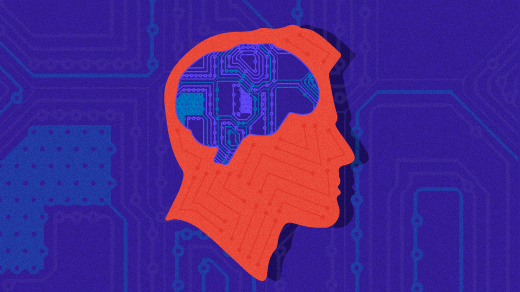

**Feature engineering to make the model**

Import other libraries for modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

Get dummies from categorical variables and create y (which contains the variables we are going to predict)

In [ ]:
X = df.drop(['math_score', 'reading_score', 'writing_score', 'math_grade', 'reading_grade', 'writing_grade', 'average_score', 'average_grade'],axis=1)
y = df[['math_score', 'reading_score', 'writing_score']]
X = pd.get_dummies(X,columns=['gender','ethnicity','parental_level_of_education','lunch','test_preparation_course'])
X.head()

Split between training data and test data

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3,random_state=10)

Create a RandomForestRegressor model, try to predict with him and see the error of its predictions

In [ ]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
preds = forest_model.predict(test_X)
print(mean_squared_error(test_y, preds))

Create a KNeighborsClassifier model, try to predict with him and see the error of its predictions

In [ ]:
mse = []
for i in range(2,101):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    preds = model.predict(test_X)
    mse.append(mean_squared_error(test_y, preds))
print(mean_squared_error(test_y, preds))

**Thanks for whatching. This is the first notebook I publish so I would appreciate it if you could give me some suggestions for improvement. Thanks again for giving it a look and good kaggling!**